## IMPORTING LIBRARIES


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset (creditcard) into pandas dataframe
movie = pd.read_csv("Movies.csv")

In [3]:
#showing the first ten Rows of the data set
movie.head(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
5,667257,Impossible Things,"Family,Drama",es,"Matilde is a woman who, after the death of her...",14.358,2021-06-17,8.6,255
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093
7,730154,Your Eyes Tell,"Romance,Drama",ja,"A tragic accident lead to Kaori's blindness, b...",51.345,2020-10-23,8.5,339
8,372754,Dou kyu sei – Classmates,"Romance,Animation",ja,"Rihito Sajo, an honor student with a perfect s...",14.285,2016-02-20,8.5,239
9,372058,Your Name.,"Romance,Animation,Drama",ja,High schoolers Mitsuha and Taki are complete s...,158.270,2016-08-26,8.5,8895


In [4]:
#showing the last ten Rows of the data set
movie.tail(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9990,146203,The Last Exorcism Part II,"Horror,Thriller",en,As Nell Sweetzer tries to build a new life aft...,15.757,2013-02-28,4.7,444
9991,551808,Black Christmas,"Horror,Mystery,Thriller",en,"During Christmas break, the women at Hawthorne...",9.811,2019-12-11,4.7,412
9992,853588,Prey,Thriller,de,A hiking trip into the wild turns into a despe...,64.052,2021-09-10,4.7,254
9993,17455,Hellraiser: Deader,"Horror,Mystery,Thriller",en,"In London, after investigating crack addicted ...",15.512,2005-06-07,4.7,227
9994,168098,Cell,"Horror,Science Fiction,Thriller",en,When a strange signal pulsates through all cel...,19.521,2016-07-06,4.7,910
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


### Checking the information of the dataset

In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [6]:
#checking the shape of the dataset
print('Shape Of The Dataset : ',movie.shape)

Shape Of The Dataset :  (10000, 9)


In [7]:
#checking the columns of the dataset
movie.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [8]:
#checking the number of unique values in each column
movie.nunique()

id                   10000
title                 9661
genre                 2123
original_language       43
overview              9985
popularity            8511
release_date          6113
vote_average            42
vote_count            3191
dtype: int64

## checking for duplicates
- if present ,then drop them

In [9]:
print('Number Of Duplicate Rows : ',movie.duplicated().sum())

Number Of Duplicate Rows :  0


## Dealing With The Missing Values

In [10]:
#checking for the missing values
movie.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [11]:
#since missing values are present in categorical columns, we will replace them with mode
print(movie.genre.isnull().sum())
mode_value = movie.genre.mode()[0]
movie.genre.fillna(mode_value, inplace=True)

3


In [12]:
print(movie.genre.isnull().sum())

0


In [13]:
movie.genre.value_counts()

Comedy                                    747
Drama                                     611
Drama,Romance                             290
Comedy,Drama                              262
Comedy,Romance                            255
                                         ... 
Fantasy,Animation,Romance,Family            1
Drama,Thriller,Crime,Western                1
Comedy,Drama,Romance,Fantasy,Adventure      1
Drama,History,Action                        1
Adventure,Fantasy,Action,Drama              1
Name: genre, Length: 2123, dtype: int64

In [14]:
#since missing values are present in categorical columns, we will replace them with mode
mode_value = movie.genre.mode()[0]
movie.overview.fillna(mode_value, inplace=True)
print(movie.overview.isnull().sum())

0


In [15]:
#checking for the missing values
movie.isnull().any()

id                   False
title                False
genre                False
original_language    False
overview             False
popularity           False
release_date         False
vote_average         False
vote_count           False
dtype: bool

<AxesSubplot:xlabel='count', ylabel='original_language'>

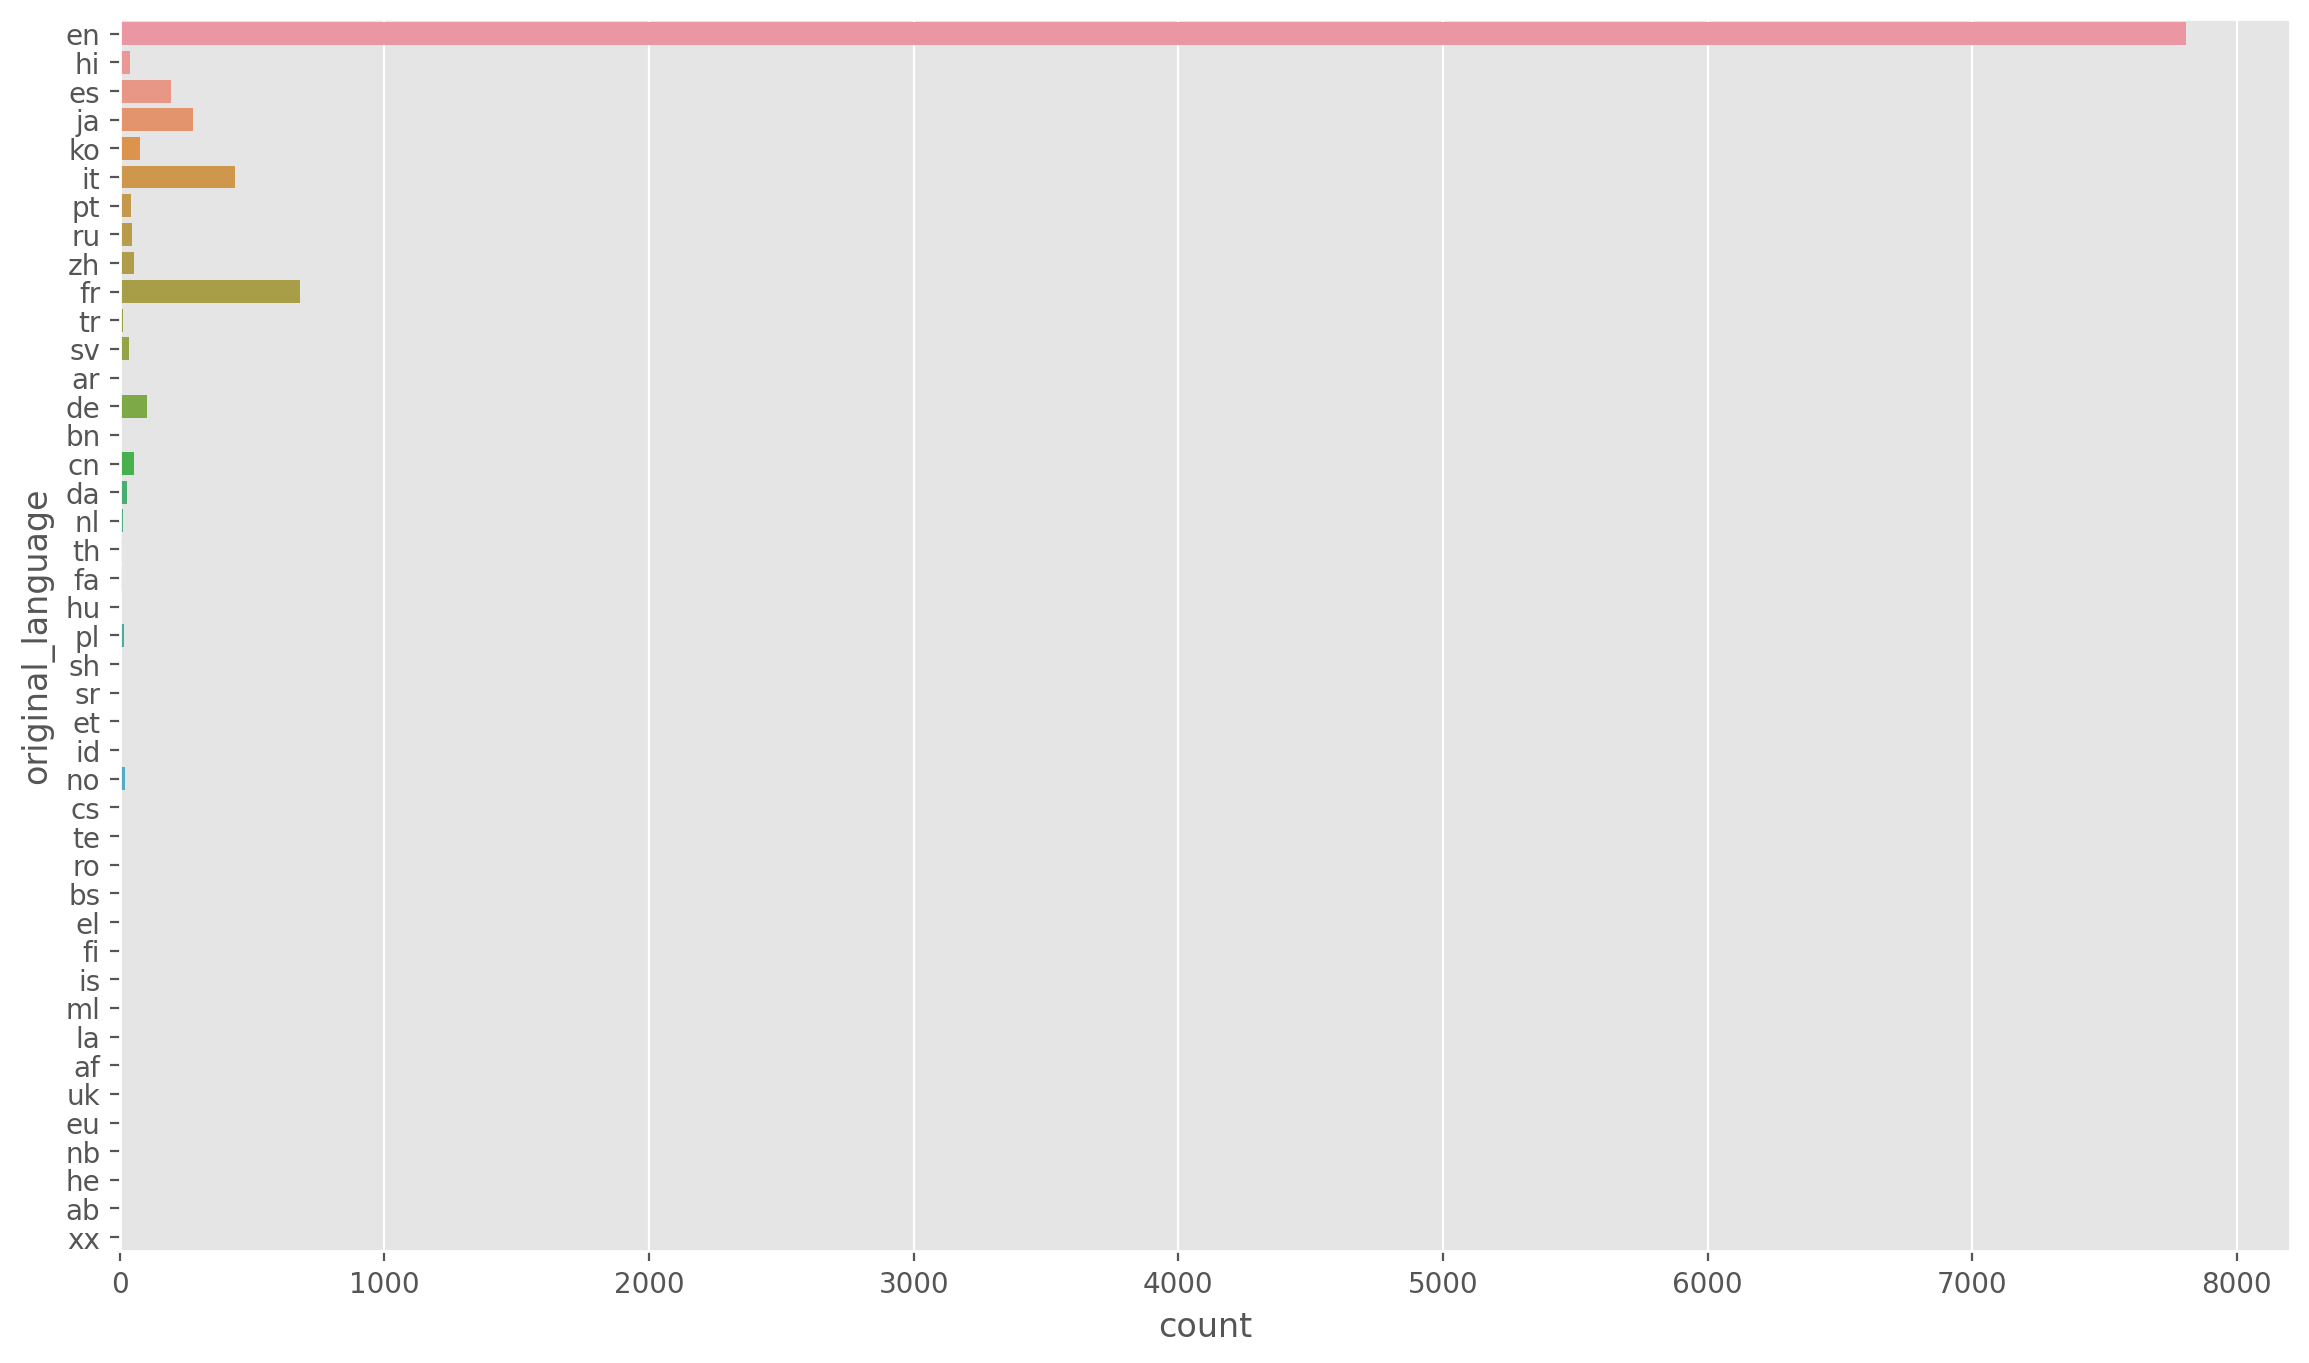

In [16]:
plt.figure(figsize = (14,8), dpi = 200)
sns.countplot(y=movie.original_language)

In [17]:
movie.original_language.value_counts()

en    7810
fr     680
it     434
ja     275
es     195
de     104
ko      76
cn      54
zh      54
ru      47
pt      43
hi      39
sv      36
da      29
no      18
pl      16
nl      12
tr      11
th      10
fa       8
hu       6
id       6
fi       4
el       4
is       3
sr       3
cs       3
eu       2
ro       2
te       2
ar       2
nb       1
af       1
he       1
ab       1
uk       1
bn       1
la       1
ml       1
bs       1
et       1
sh       1
xx       1
Name: original_language, dtype: int64

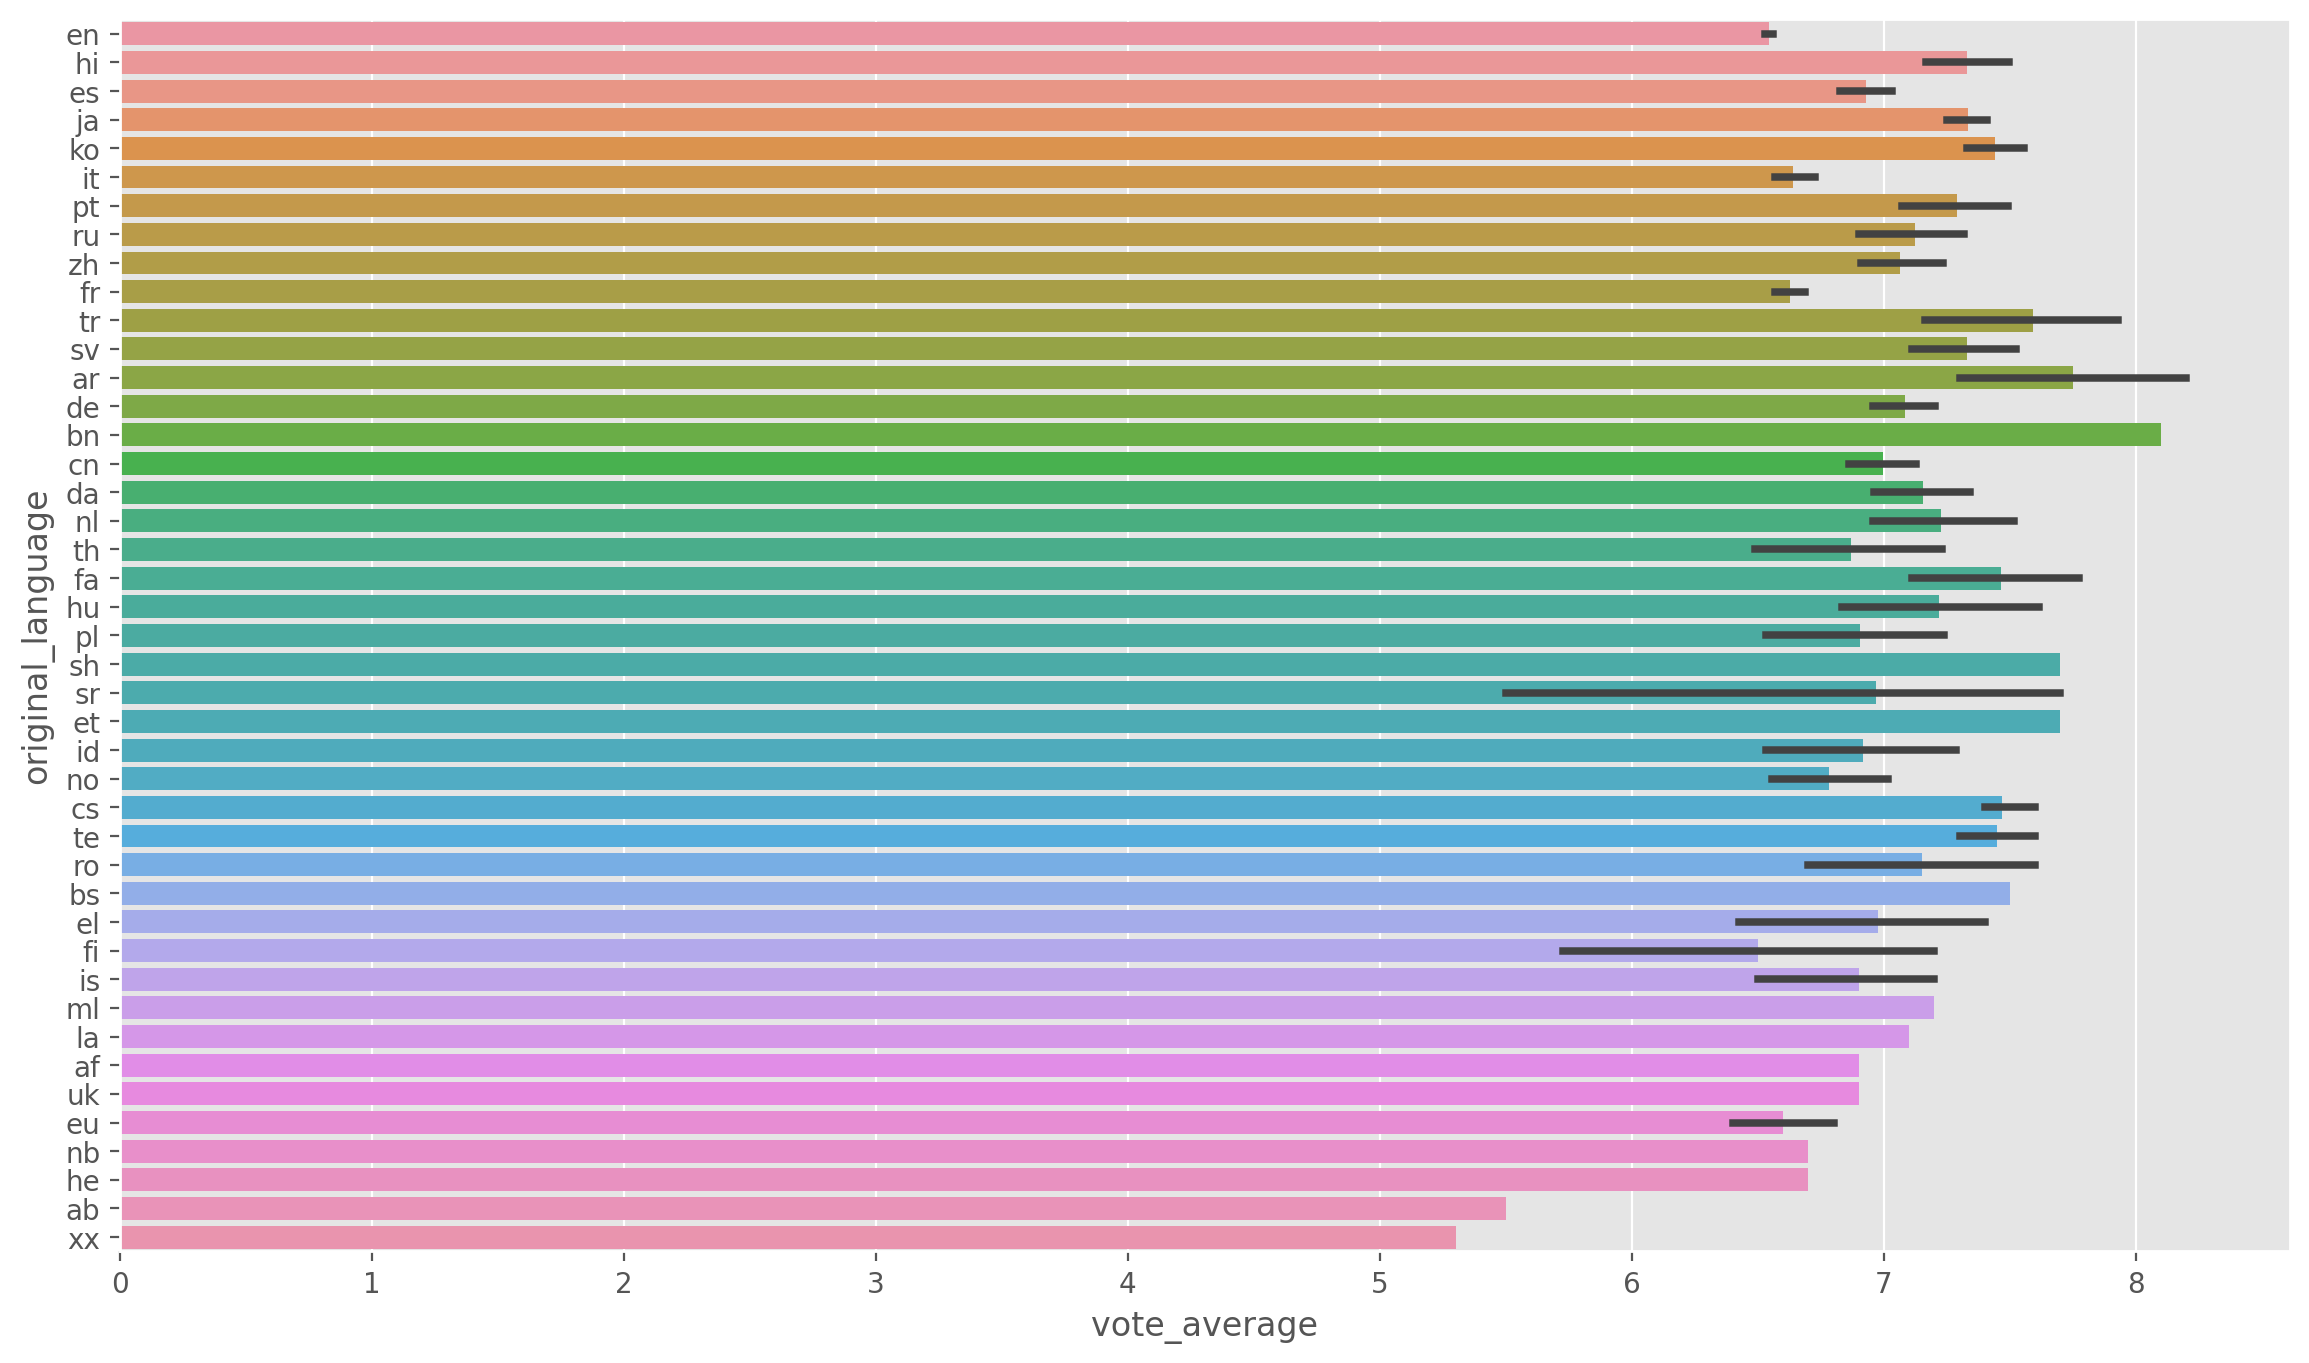

In [18]:
plt.figure(figsize = (14,8), dpi = 200)
sns.barplot(y=movie.original_language,x=movie.vote_average)
plt.show()

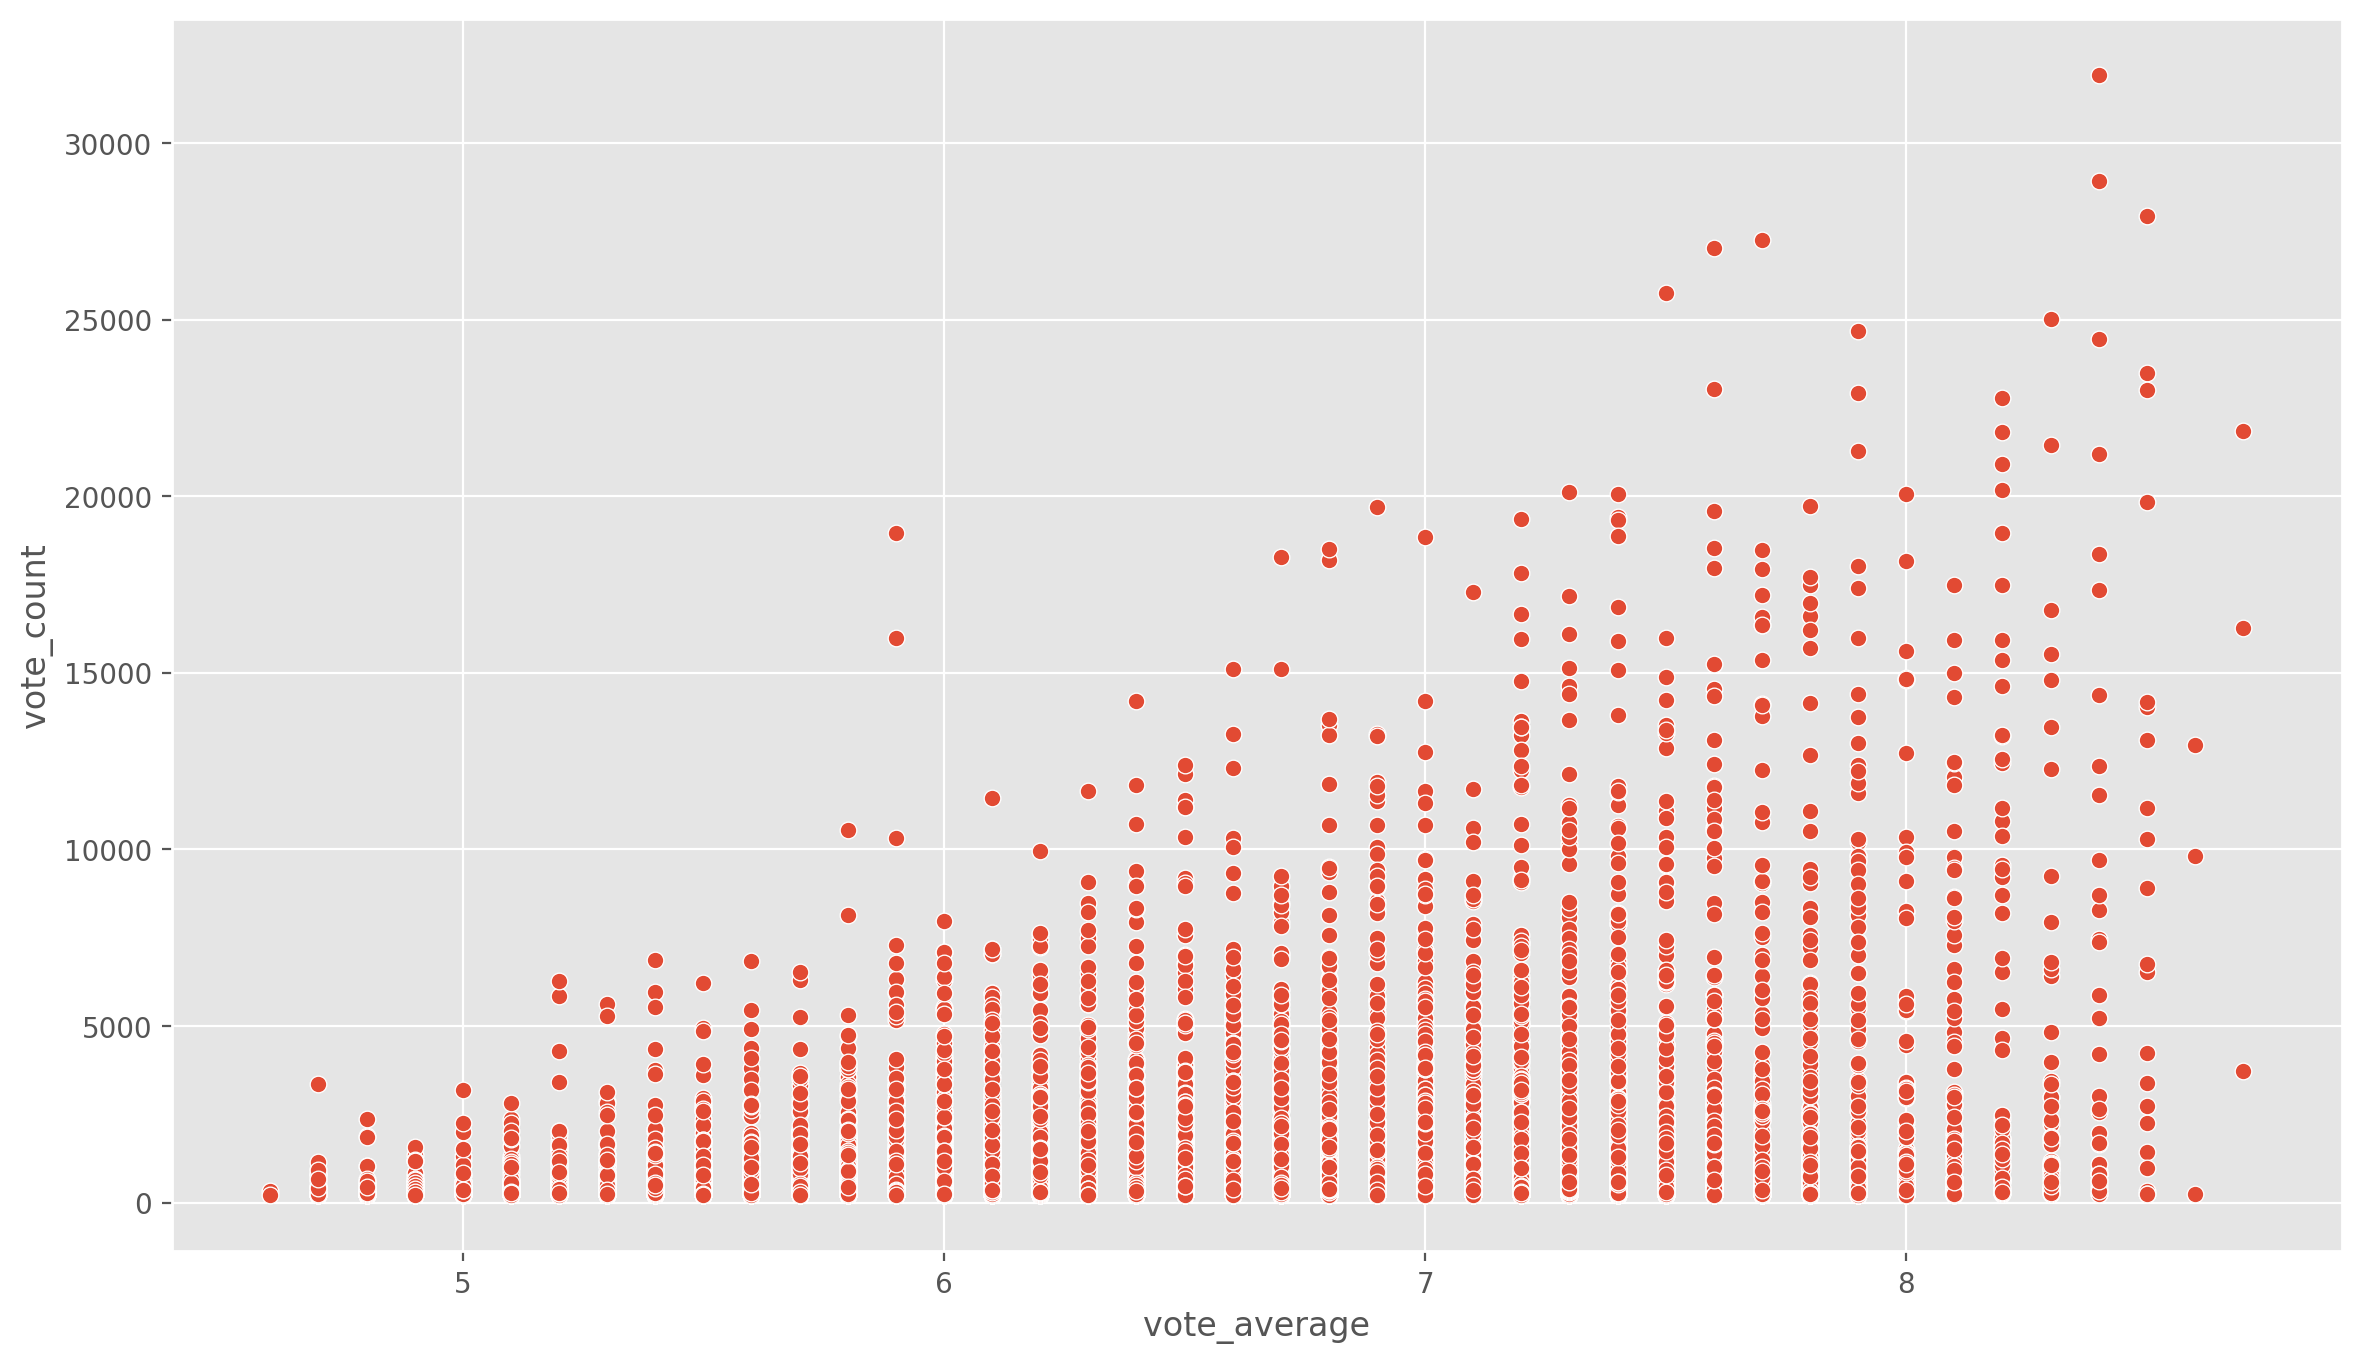

In [19]:
plt.figure(figsize = (14,8), dpi = 200)
sns.scatterplot(movie.vote_average,movie.vote_count)
plt.show()

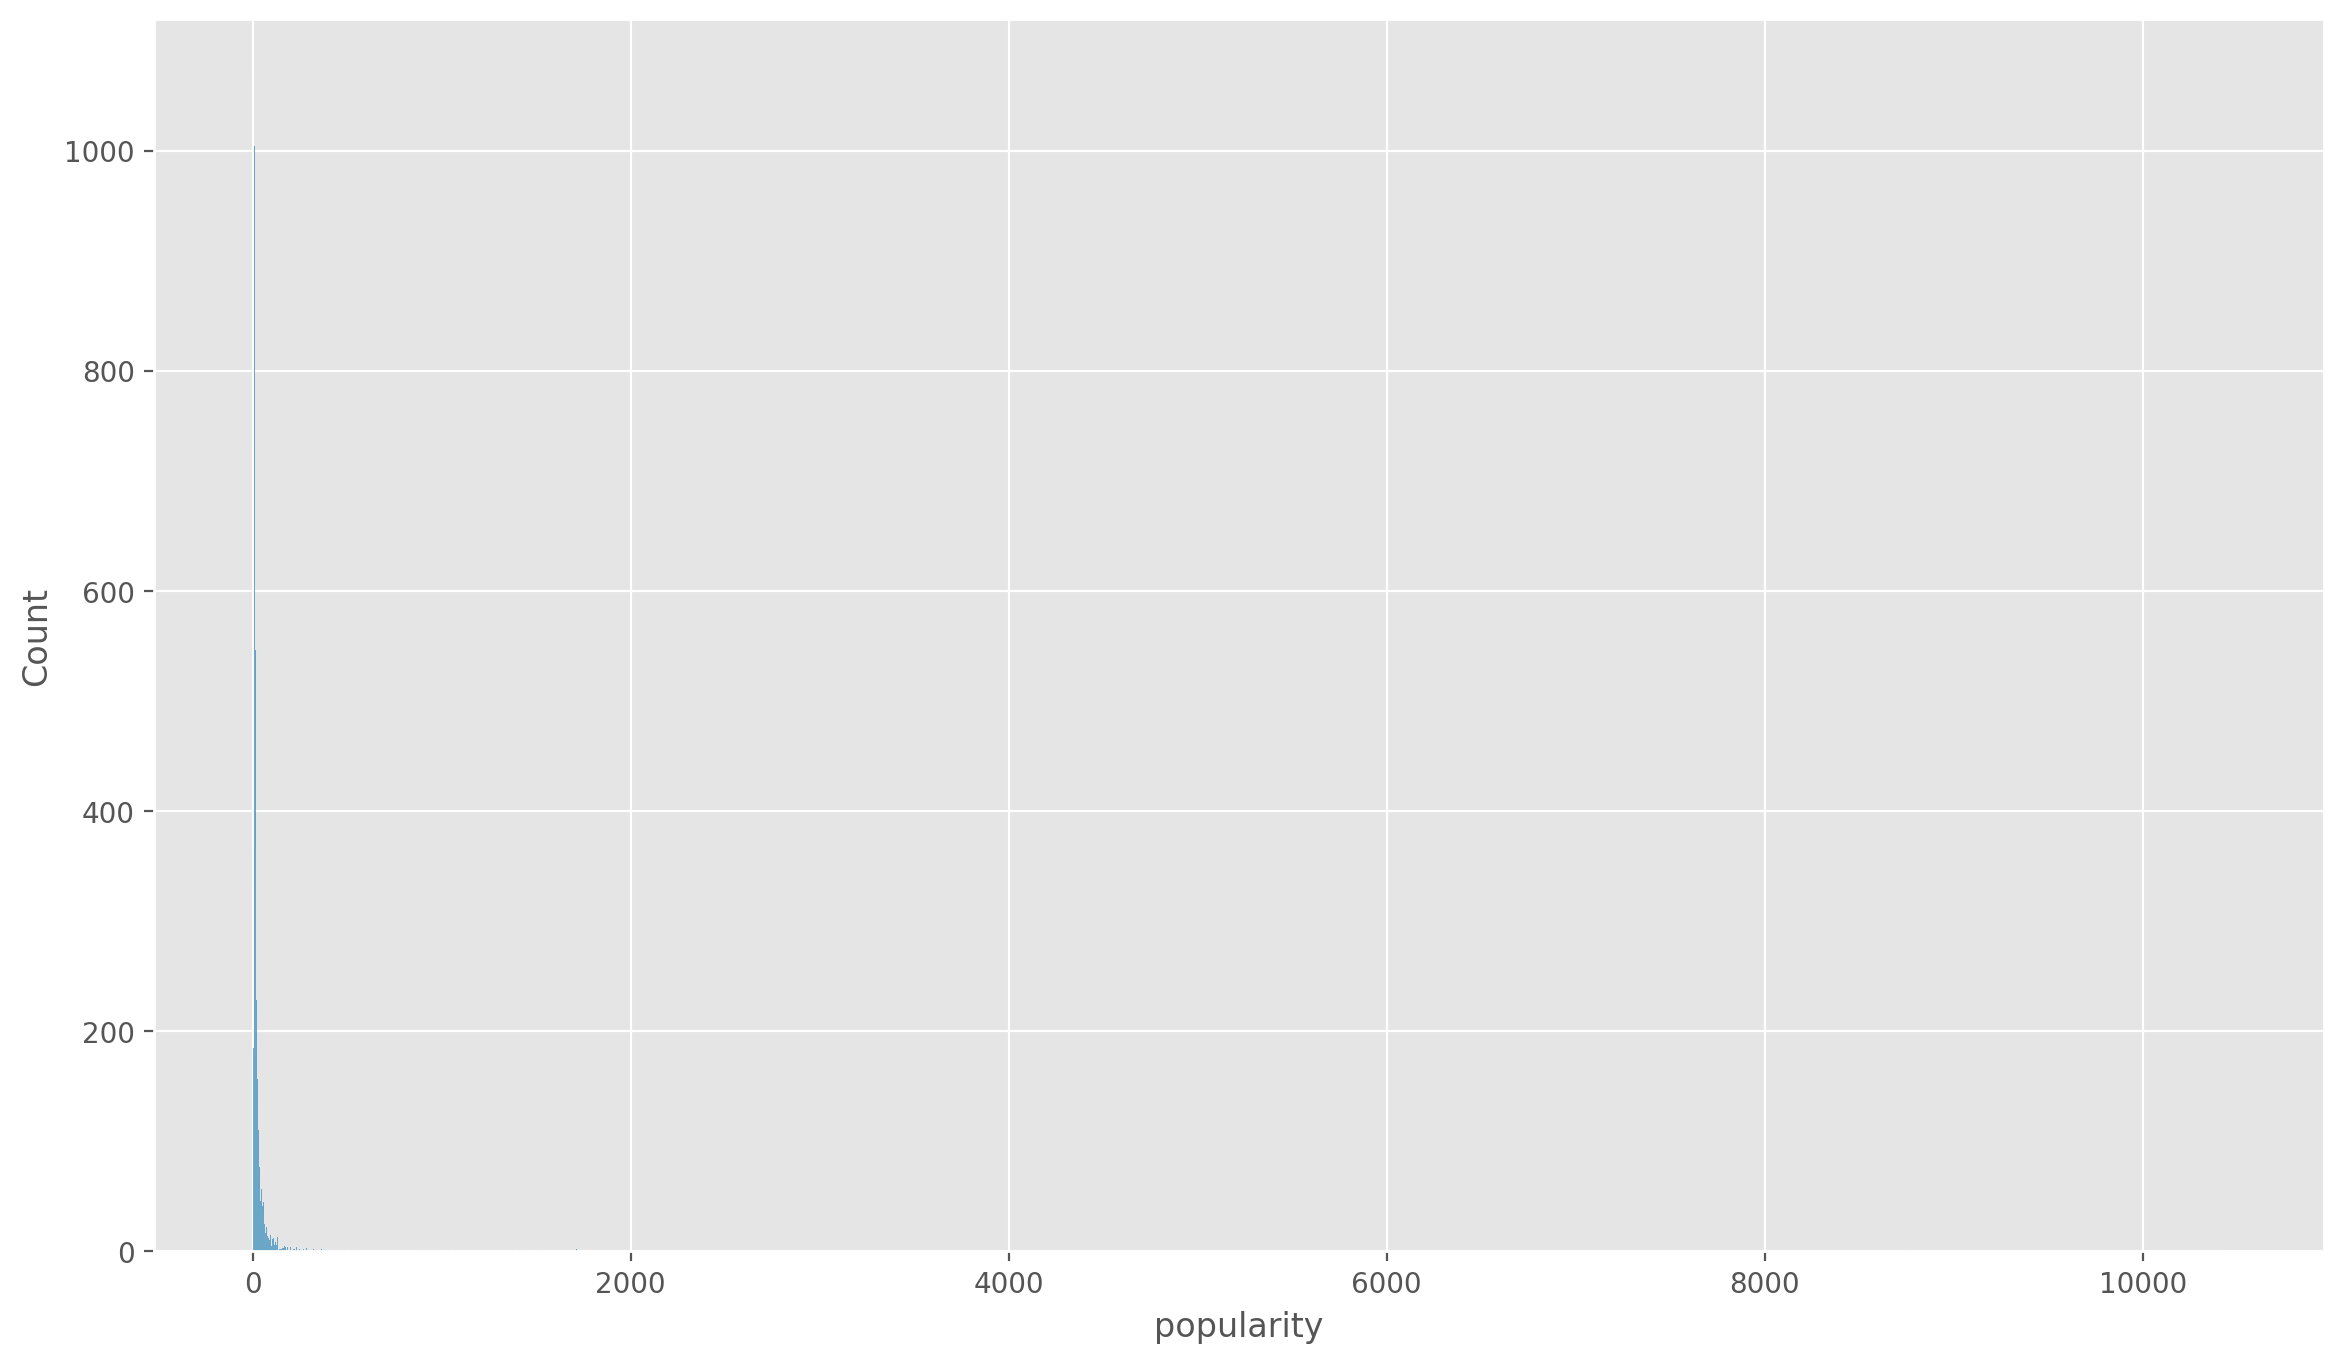

In [20]:
plt.figure(figsize = (14,8), dpi = 200)
sns.histplot(movie.popularity)
plt.show()

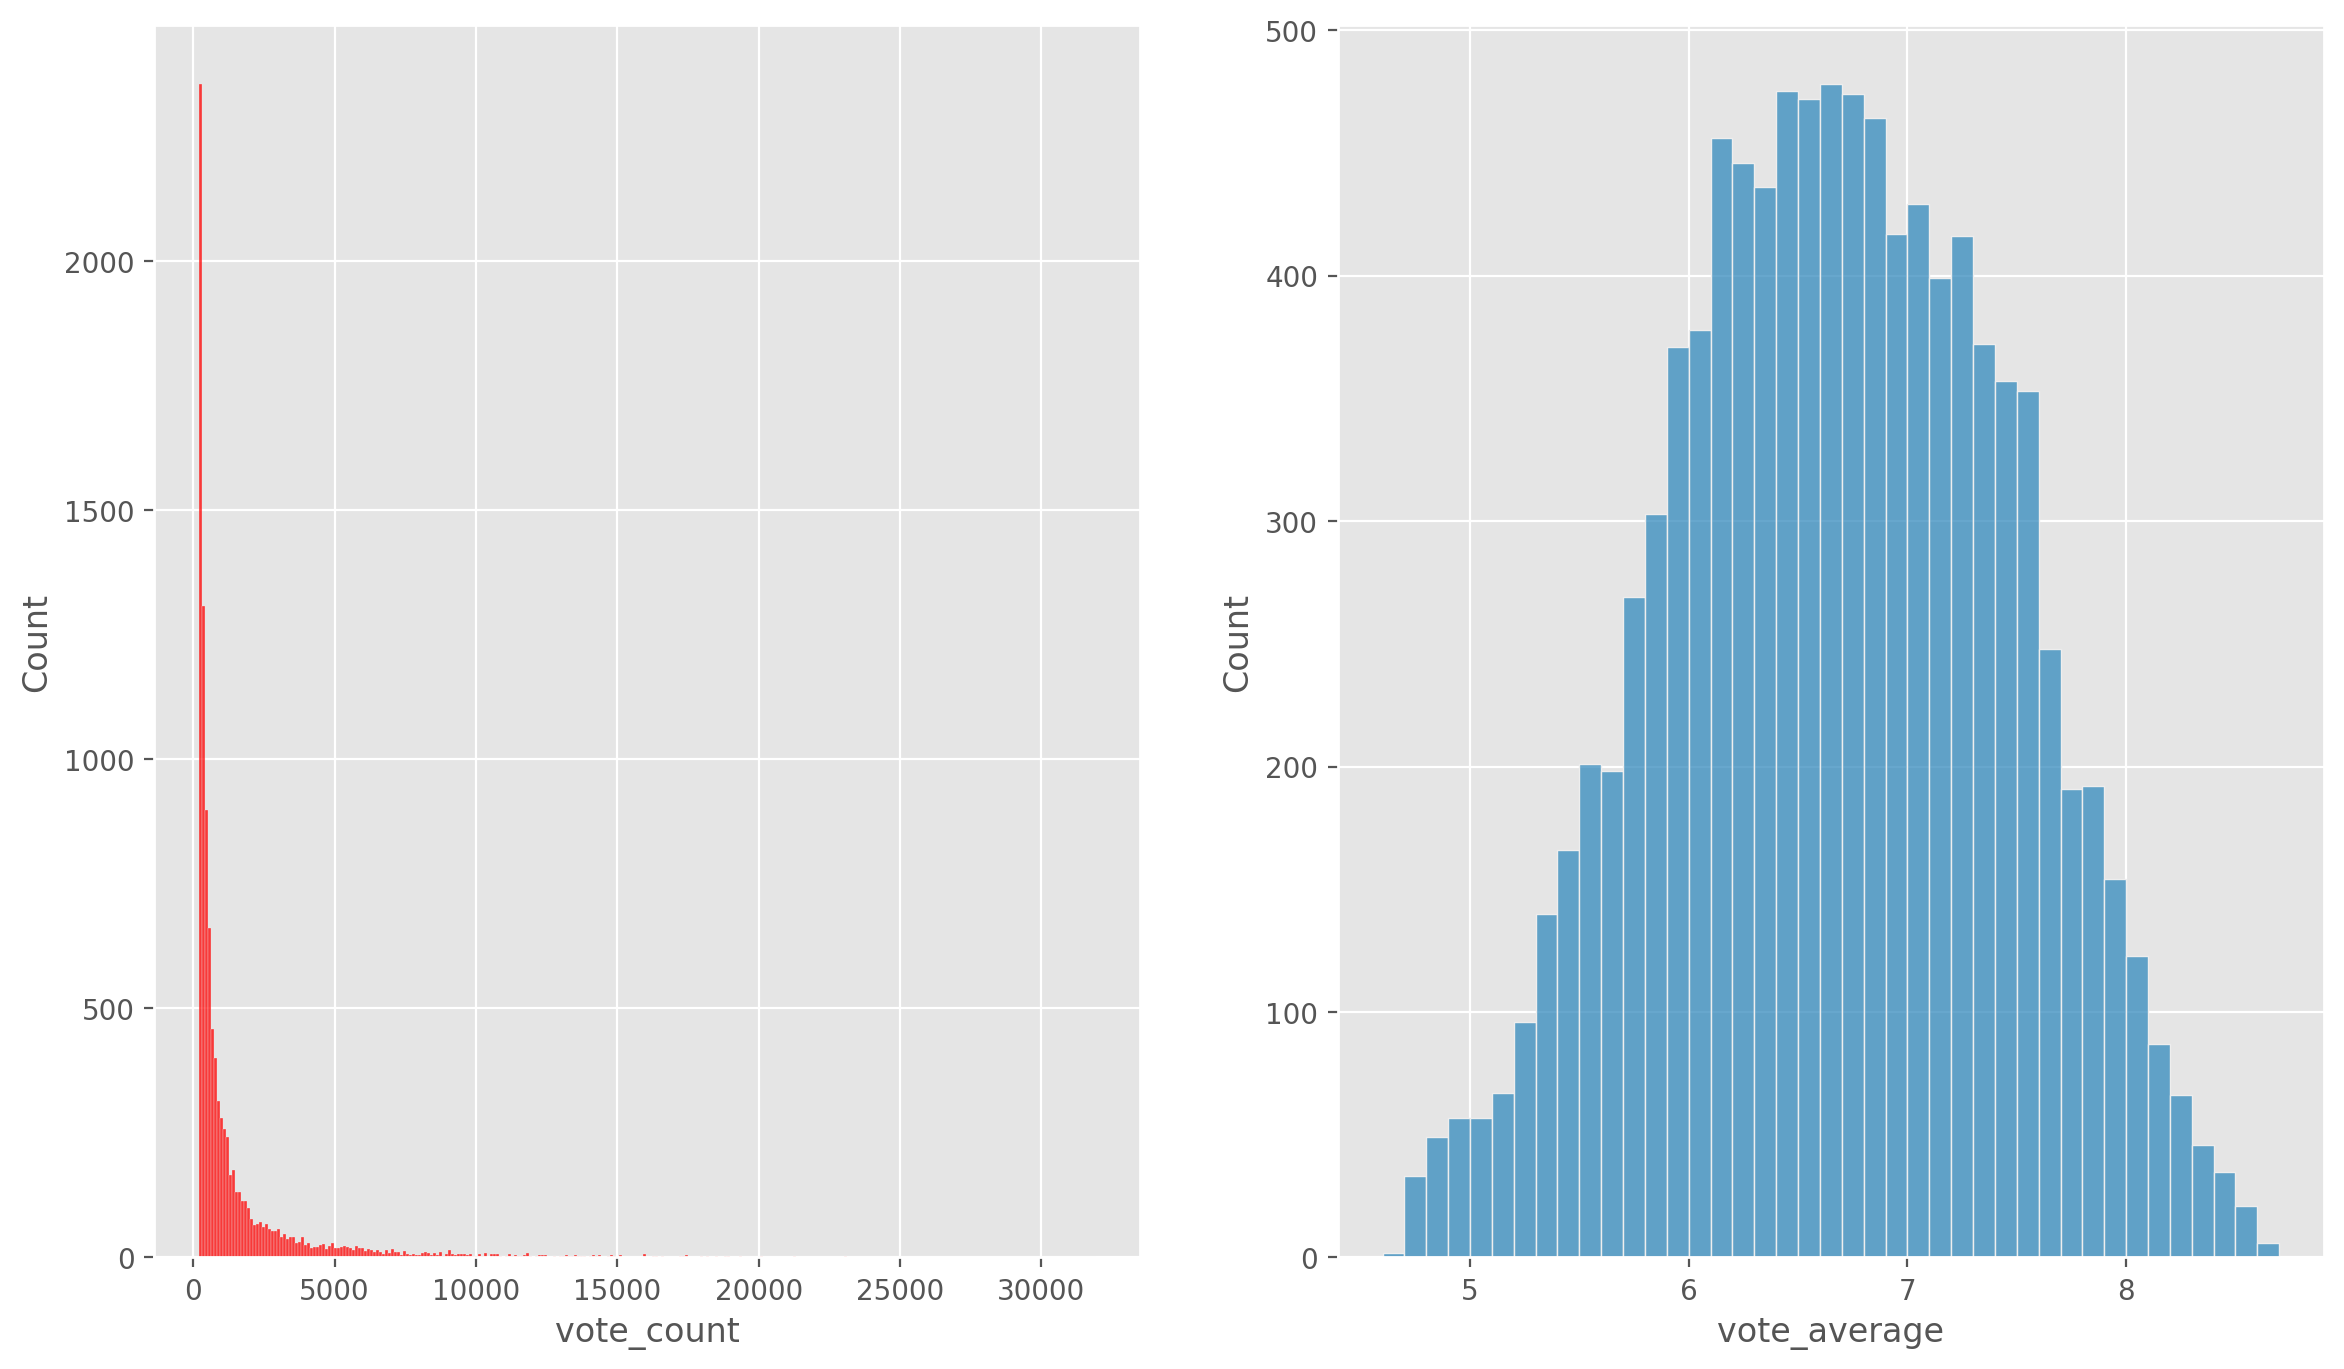

In [21]:
plt.figure(figsize = (14,8), dpi = 200)
plt.subplot(1,2,1)
sns.histplot(movie.vote_count,color='red')
plt.subplot(1,2,2)
sns.histplot(movie.vote_average)
plt.show()
plt.show()

## Checking Some Statistical Values

In [22]:
movie.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [23]:
movie.corr()

,id,popularity,vote_average,vote_count
id,1.000000,0.120659,-0.005508,-0.066145
popularity,0.120659,1.000000,0.063578,0.092843
vote_average,-0.005508,0.063578,1.000000,0.267764
vote_count,-0.066145,0.092843,0.267764,1.000000


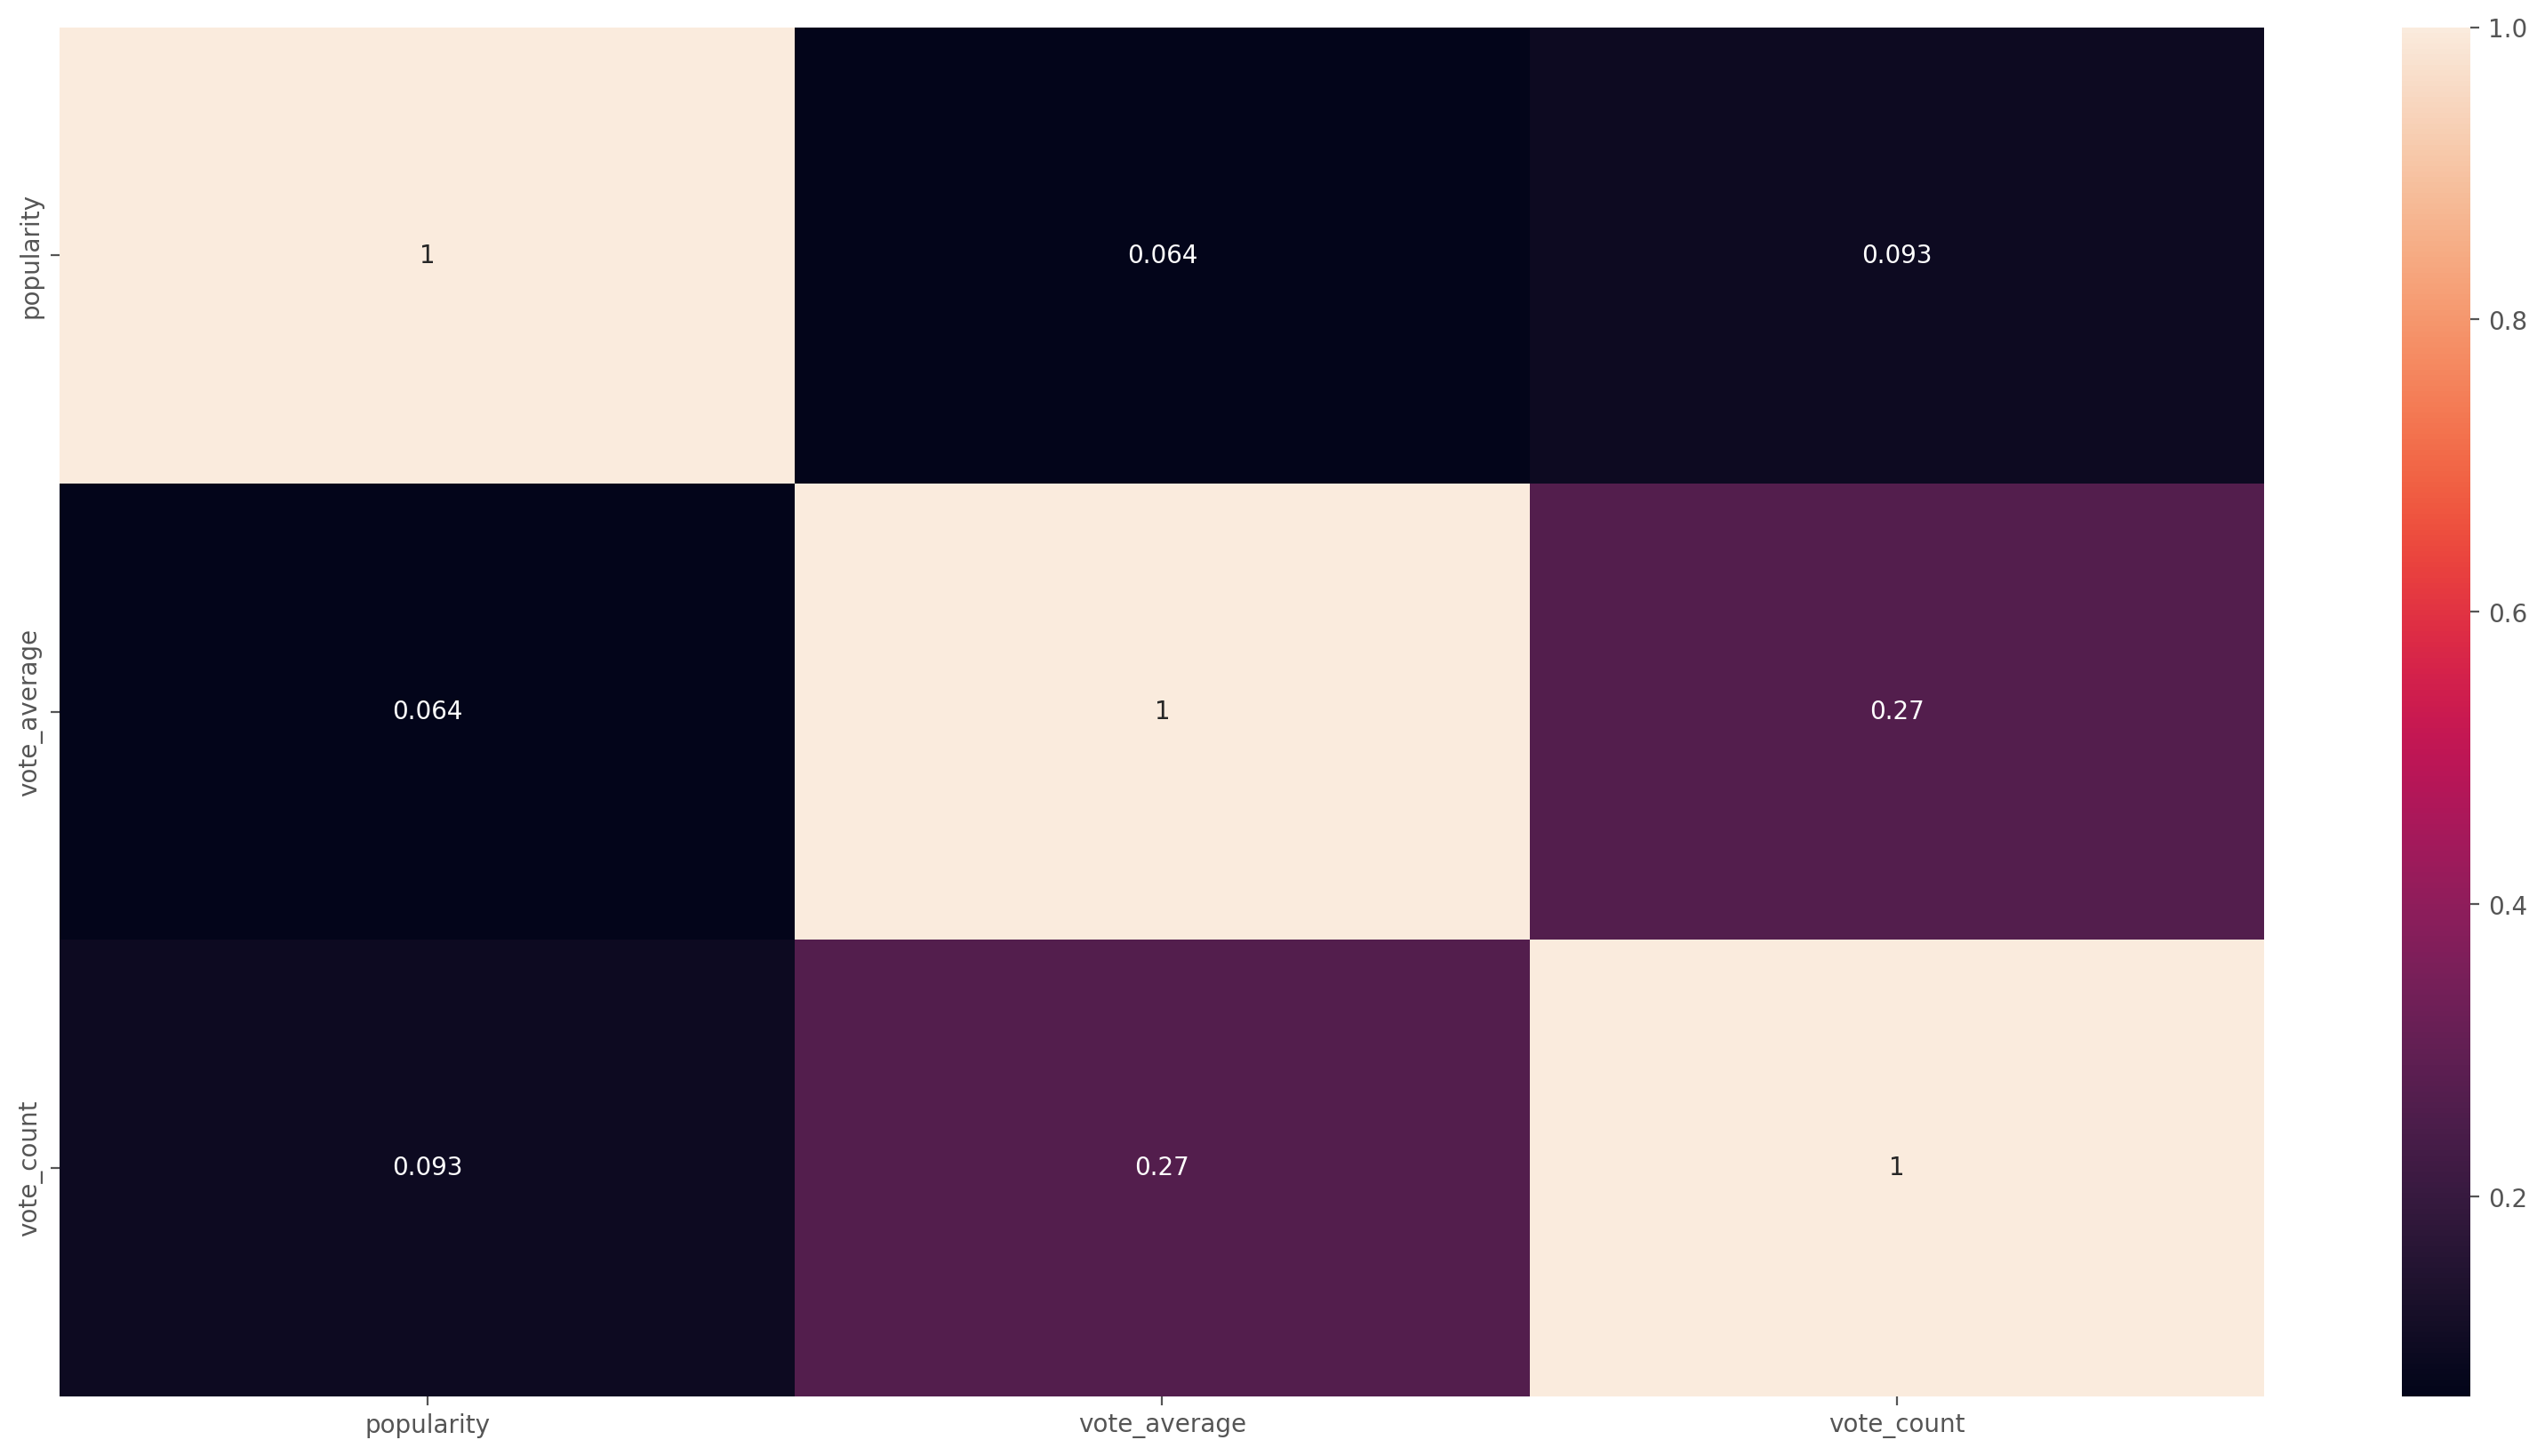

In [24]:
cols=['popularity','vote_average','vote_count']
plt.figure(figsize = (20,10), dpi = 200)
sns.heatmap(movie[cols].corr(), annot = True)
plt.show()

<Figure size 6400x4800 with 0 Axes>

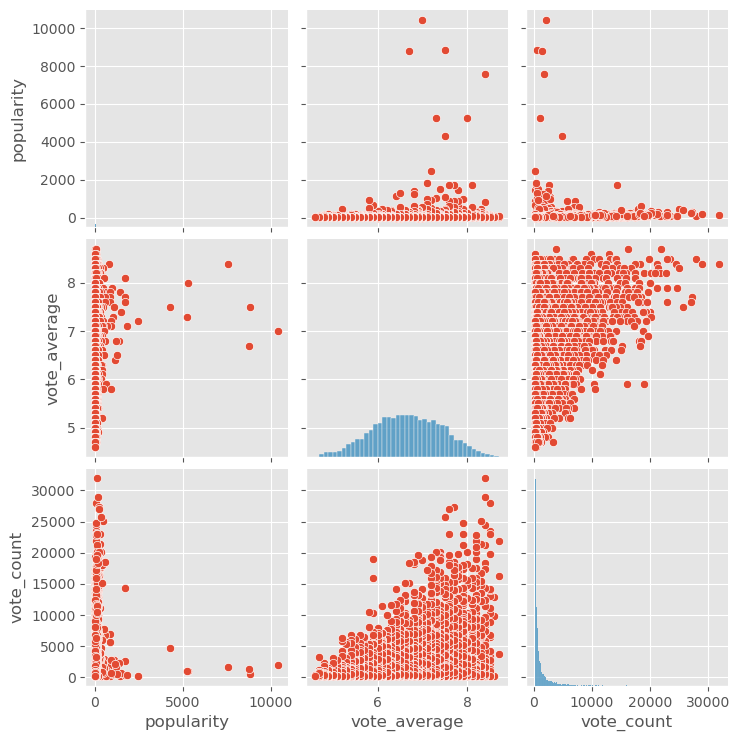

In [25]:
cols=['popularity','vote_average','vote_count']
plt.figure(dpi = 1000)
sns.pairplot(movie[cols])

### Feature selection part

In [30]:
# as we need the necessary columns 
movie=movie[['id', 'title', 'overview', 'genre']]

In [31]:
movie.head(5)

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"


In [32]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10000 non-null  int64 
 1   title     10000 non-null  object
 2   overview  10000 non-null  object
 3   genre     10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [34]:
#creating a new column that is the combination of overview and genre
movie['tags'] = movie['overview']+movie['genre']

In [35]:
movie.head(5)

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...


In [36]:
# dropping the columns genre and overview
new_data  = movie.drop(columns=['overview', 'genre'])

In [40]:
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [42]:
# initializing the count vectoriser
cv=CountVectorizer(max_features=10000, stop_words='english')

In [43]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [46]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [47]:
vector.shape

(10000, 10000)

In [49]:
#using similarity
similarity=cosine_similarity(vector)


In [50]:
similarity


array([[1.        , 0.05555556, 0.12858612, ..., 0.0745356 , 0.10910895,
        0.06804138],
       [0.05555556, 1.        , 0.07715167, ..., 0.        , 0.03636965,
        0.        ],
       [0.12858612, 0.07715167, 1.        , ..., 0.02300219, 0.0673435 ,
        0.09449112],
       ...,
       [0.0745356 , 0.        , 0.02300219, ..., 1.        , 0.03253   ,
        0.03042903],
       [0.10910895, 0.03636965, 0.0673435 , ..., 0.03253   , 1.        ,
        0.04454354],
       [0.06804138, 0.        , 0.09449112, ..., 0.03042903, 0.04454354,
        1.        ]])

In [51]:
#here using index number,based on that ,movie is recommended - for example,
new_data[new_data['title']=="The Godfather"].index[0]

2

In [52]:
#calculate distance based on similarity
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [53]:
#creating functions 
def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [54]:
recommand("Iron Man")

Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith


In [61]:
recommand("The Godfather")

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [62]:
recommand("Schindler's List")

Schindler's List
Resistance
The Counterfeiters
The Railway Man
Midway


In [63]:
user = input("Enter The Movie Name : ")
print("Recommended Movies Are : " , recommand(user))

Enter The Movie Name : Iron Man
Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith
Recommended Movies Are :  None
